Loading and understanding the Data structure

In [2]:
#import library and load the dataset
import pandas as pd

file_path = r"C:\Users\User\Documents\My Documents\CW2 Group\online_retail.csv"

df = pd.read_csv(file_path)
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Check no.of rows and colunms
df.shape

(541909, 9)

In [4]:
#Check the data types
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Exploratory Data Analysis

In [5]:
#check missing values
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#replace the missing value with the Unknown but can create issues in the analysis of customer segmentation
#df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [7]:
#Drop the customerID with missing values 
df = df.dropna(subset=['CustomerID'])


In [8]:
#Fill missing description with unknown
df['Description'] = df['Description'].fillna('Unknown')


In [9]:
#Ensure no missing values are available in the dataset
print(df.isnull().sum())  


index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [10]:
#Check duplicated rows
duplicated_rows=df.duplicated().sum()
print("No of duplicated rows:",duplicated_rows )


No of duplicated rows: 0


In [11]:
#Find negative values
print("No of negative quanity: ", df[df["Quantity"] <= 0].shape[0])
print("No of negative unit price: ", df[df["UnitPrice"] <= 0].shape[0])

No of negative quanity:  8905
No of negative unit price:  40


In [12]:
#Removing neagtive value of Quanity 
df = df[df['Quantity'] > 0]

In [13]:
#Removing neagtive value of Quanity 
df = df[df['UnitPrice'] > 0]

In [14]:
# Ensure there's no negative values for quantity and unitprice
print("No of negative quanity: ", df[df["Quantity"] <= 0].shape[0])
print("No of negative unit price: ", df[df["UnitPrice"] <= 0].shape[0])

No of negative quanity:  0
No of negative unit price:  0


In [15]:
# Convert InvoiceNo and StockCode to string 
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

# Convert InvoiceDate to datetime format if we need to do time based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to string 
df['CustomerID'] = df['CustomerID'].astype(str)

# Convert Country to categorical type 
df['Country'] = df['Country'].astype('category')

#Convert index to string type
df['index'] = df['index'].astype(str)  

df.dtypes


index                  object
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country              category
dtype: object

In [16]:
#Create TotalPrice  per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
#02Create additional columns by categorizing the Date for the analysis of seasonal trends

# categorize date components into year, month, day, weekday,working hour and weekend
#df['Year'] = df['InvoiceDate'].dt.year
#df['Month'] = df['InvoiceDate'].dt.month
#df['Day'] = df['InvoiceDate'].dt.day
#df['Weekday'] = df['InvoiceDate'].dt.weekday  # Monday = 0, Sunday = 6
#df['Hour'] = df['InvoiceDate'].dt.hour

# Create a feature for working hours 
#df['IsWorkingHour'] = df['Hour'].apply(lambda x: 1 if 9 <= x <= 18 else 0)

# Check if the purchase was made on a weekend
#df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

#Display created columns
#print(df[['Year', 'Month', 'Day', 'Weekday', 'Hour', 'IsWeekend']].head())

In [18]:
#Customer recency
import datetime
latest_date = df['InvoiceDate'].max()  # Get last transaction date
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days)

#print 5 rows of customer recency by ensuring one row per customerID
print(df[['CustomerID', 'InvoiceDate', 'Recency']].drop_duplicates(subset=['CustomerID']).head(5))

#print a random customer's recency to ensure that recency values aren’t biased
print(df[['CustomerID', 'Recency']].drop_duplicates().sample(5)) 


   CustomerID         InvoiceDate  Recency
0     17850.0 2010-12-01 08:26:00      371
9     13047.0 2010-12-01 08:34:00       31
26    12583.0 2010-12-01 08:45:00        2
46    13748.0 2010-12-01 09:00:00       95
65    15100.0 2010-12-01 09:09:00      333
       CustomerID  Recency
236390    17877.0      169
72850     14442.0      204
19899     12797.0      365
177543    15757.0       65
530144    15318.0        3


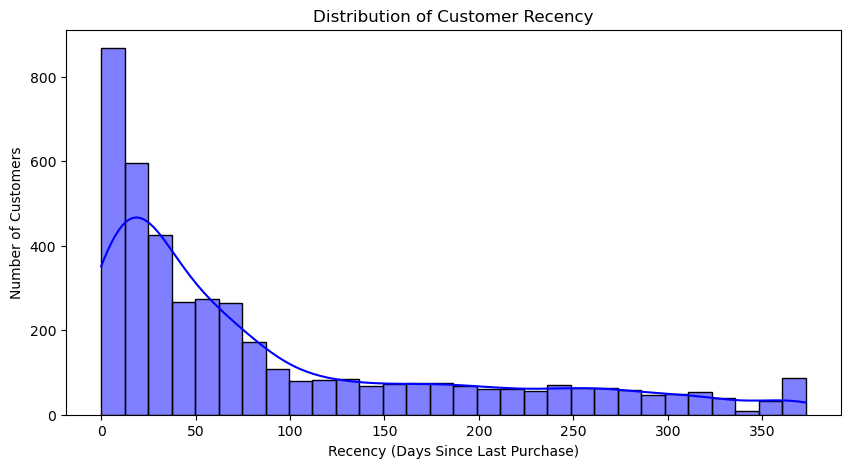

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract unique customers and their recency
unique_customers = df[['CustomerID', 'Recency']].drop_duplicates()

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(unique_customers['Recency'], bins=30, kde=True, color="blue")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Recency")
plt.show()

#Customers with lower recency are recent buyers.
#Customers with higher recency haven't bought anything in a while.


In [20]:
#Create customer-based aggregations to find the total spend, total number of purchases and average order value per customer
#High value customers can be targeted for loyalty program

# Total spend per customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
print(customer_spending.head())


  CustomerID  TotalPrice
0    12346.0    77183.60
1    12347.0     4310.00
2    12348.0     1797.24
3    12349.0     1757.55
4    12350.0      334.40


In [21]:
# Average order value per customer
customer_avg_order = df.groupby('CustomerID')['TotalPrice'].mean().reset_index()
print(customer_avg_order.head())

  CustomerID    TotalPrice
0    12346.0  77183.600000
1    12347.0     23.681319
2    12348.0     57.975484
3    12349.0     24.076027
4    12350.0     19.670588


In [22]:
# Total number of purchases per customer
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
print(customer_frequency.head())

  CustomerID  InvoiceNo
0    12346.0          1
1    12347.0          7
2    12348.0          4
3    12349.0          1
4    12350.0          1


In [23]:
#Find the popular product based on the purchase quantity grouping by description

# Total quantity sold per product (grouping by Description)
popular_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Find most sold products
popular_products = popular_products.sort_values(by='Quantity', ascending=False)

# Get popular products (Top 100)
df['IsPopularProduct'] = df['Description'].apply(lambda x: 1 if x in popular_products['Description'][:100].values else 0)

# Display top products
print(popular_products.head(10))

                             Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1762             JUMBO BAG RED RETROSPOT     46181
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725
216        ASSORTED COLOUR BIRD ORNAMENT     35362
2269     PACK OF 72 RETROSPOT CAKE CASES     33693
2600                      POPCORN HOLDER     30931
2656                  RABBIT NIGHT LIGHT     27202
2047             MINI PAINT SET VINTAGE      26076


In [24]:
#get summary statistics of dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice,Recency,IsPopularProduct
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,22.397000,40.125680,0.154671
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000,0.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,4.680000,3.000000,0.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,11.800000,15.000000,0.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,19.800000,42.000000,0.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000,373.000000,1.000000
std,179.331775,NaN,22.097877,309.071041,65.471933,0.361591


In [25]:
#Monthly sales analysis where can identify  better marketing strategies according to the peak sales months

#import matplotlib.pyplot as plt
#import seaborn as sns

#monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

#plt.figure(figsize=(8,4))
#sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
#plt.title('Monthly Sales Trend')
#plt.xlabel('Month')
#plt.ylabel('Total Sales')
#plt.grid()
#plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9716\126377677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_10_products, palette='viridis')


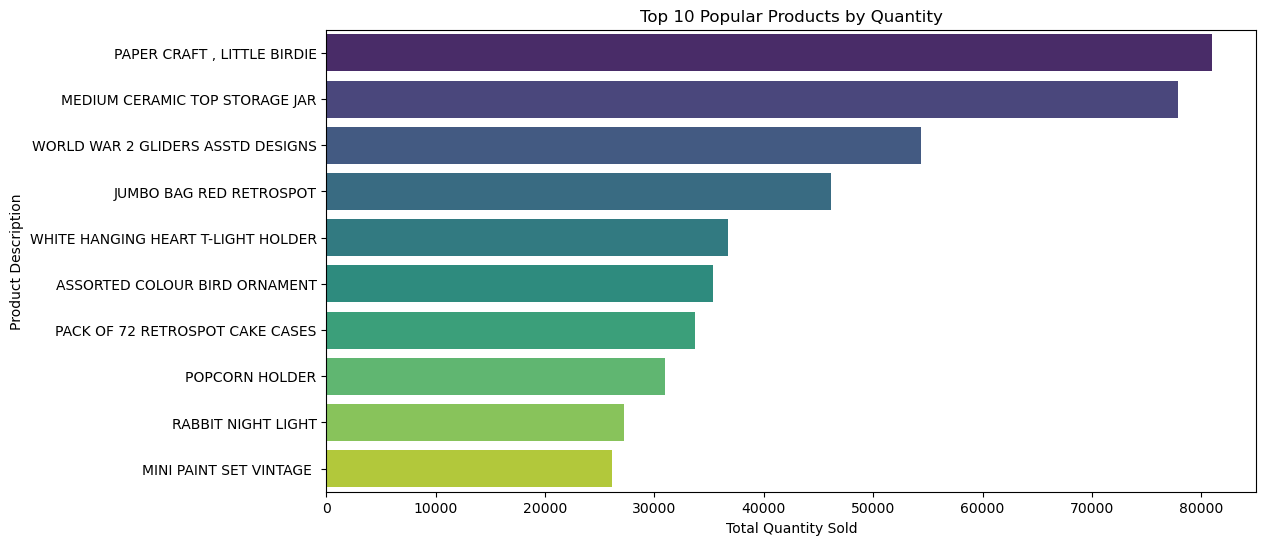

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total quantity sold per product
popular_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort by highest quantity and take the top 10
top_10_products = popular_products.sort_values(by='Quantity', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_10_products, palette='viridis')

# Add labels and title
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Popular Products by Quantity')
plt.show()


In [27]:
# Total revenue across all transactions
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: {total_revenue:.2f}")


Total Revenue: 8911407.90


In [28]:
# Calculate total sales per country
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort in descending order
top_countries = country_sales.sort_values(by='TotalPrice', ascending=False).head(10)

# Display top 10 countries by sales
print(top_countries)


           Country   TotalPrice
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Germany   228867.140
13          France   209024.050
0        Australia   138521.310
30           Spain    61577.110
32     Switzerland    56443.950
3          Belgium    41196.340
31          Sweden    38378.330


C:\Users\User\AppData\Local\Temp\ipykernel_9716\256680056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()


In [29]:
# Visualizing Top 10 Countries by Revenue
top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9716\587565128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))


KeyError: 'Column not found: Revenue'

C:\Users\User\AppData\Local\Temp\ipykernel_16160\4192456523.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="InvoiceNo", y="Revenue", data=top_invoices, palette="Blues_r")


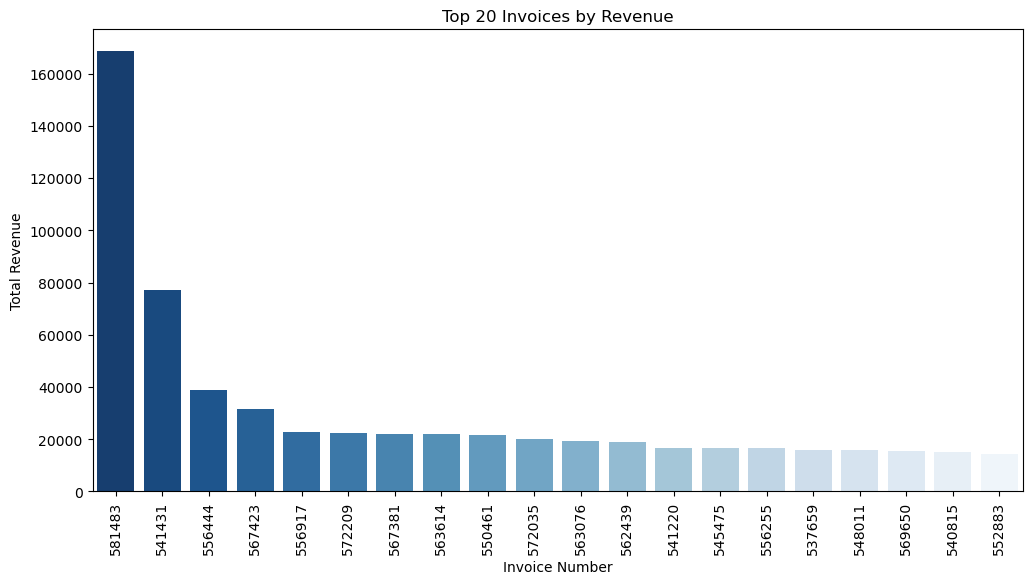

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total_revenue_per_invoice = df.groupby('InvoiceNo')['Revenue'].sum().reset_index()

# Getting top 20 invoices by revenue
top_invoices = total_revenue_per_invoice.sort_values(by="Revenue", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="InvoiceNo", y="Revenue", data=top_invoices, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 20 Invoices by Revenue")
plt.xlabel("Invoice Number")
plt.ylabel("Total Revenue")
plt.show()


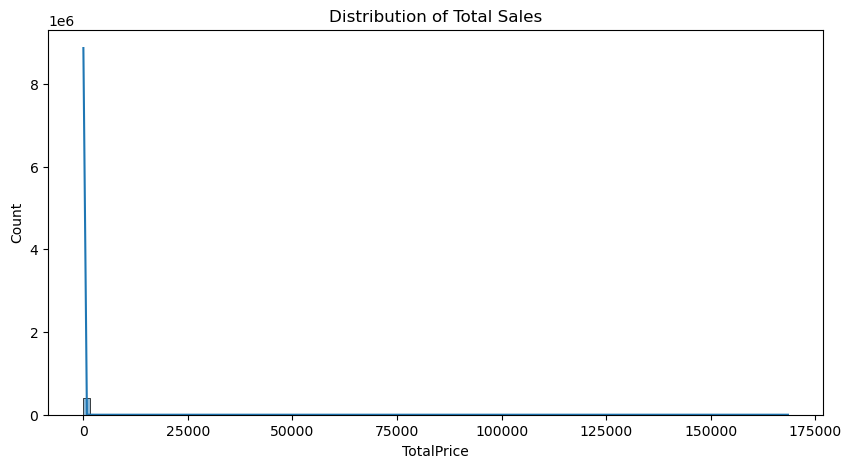

In [ ]:
#Distribution of total sale
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.title('Distribution of Total Sales')
plt.show()


# Market basket Analysis 

In [ ]:
#The main features required to do the market basket analysis are, Invoice ID, stock code, Description,Quantity, Invoice Date and unit price

#Converting the datatypes of the features

df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)

print(df[['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'UnitPrice','Quantity']].dtypes)


InvoiceNo              object
StockCode              object
Description            object
InvoiceDate    datetime64[ns]
UnitPrice             float64
Quantity                int32
dtype: object


In [ ]:
# Keep only the necessary columns
df_mba = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity','InvoiceDate', 'UnitPrice']]

# Check the resulting DataFrame to confirm
print(df_mba.head())

      InvoiceNo StockCode                          Description  Quantity  \
index                                                                      
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

              InvoiceDate  UnitPrice  
index                                 
0     2010-12-01 08:26:00       2.55  
1     2010-12-01 08:26:00       3.39  
2     2010-12-01 08:26:00       2.75  
3     2010-12-01 08:26:00       3.39  
4     2010-12-01 08:26:00       3.39  


In [ ]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

#Pivot the data to create a transactional dataset
basket = df.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

#Convert quantities into 1 (purchased) or 0 (not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print(basket.head())

C:\Users\User\AppData\Local\Temp\ipykernel_16160\4232549723.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                         

In [ ]:
# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display top 10 frequent itemsets
frequent_itemsets.sort_values(by="support", ascending=False).head(10)


NameError: name 'apriori' is not defined